### Sveučilište u Zagrebu

### Fakultet organizacije i informatike

### Varaždin

# **Analiza podataka o turističkim destinacijama i posjetiteljima u Europi**

#### Projekt

### Programiranje za analizu podataka

#### Ivana Hranj


Varaždin, 2025.

## **Sadržaj**

1. Uvod
2. Metode i tehnike rada
3. Obrada podataka
4. Pohrana u bazu podataka
5. REST API
6. Analiza podataka i vizualizacija
7. Kritički osvrt
8. Zaključak
9. Literatura

## **1. Uvod**

Turizam predstavlja jednu od najvažnijih gospodarskih grana u Europi. Europa je bogata raznolikim turističkim destinacijama, od povijesnih gradova do prirodnih ljepota, što privlači milijune posjetitelja svake godine

Cilj ovog projekta je istražiti turističke podatke s fokusom na europske destinacije primjenom različitih metoda analize podataka u Pythonu. Projekt će obuhvatiti korake prikupljanja, pretprocesiranja, analize i vizualizacije podataka. U okviru projekta koristit će se Python biblioteke za manipulaciju, analizu i vizualizaciju podataka. Osim toga, analizirani podaci bit će pohranjeni u SQLite bazu podataka, što će omogućiti pouzdanu i jednostavnu lokalnu pohranu podataka. REST API bit će izrađen uz pomoć Flask biblioteke kako bi se osigurala interakcija s podacima putem web usluga.

Motivacija za odabir ove teme proizlazi prvenstveno iz želje za istraživanjem novih pristupa radu s podacima i otkrivanjem mogućnosti koje pruža Python. Također, željela sam se okušati u samostalnoj analizi podataka, budući da je analiza podataka danas ključna za donošenje odluka u mnogim područjima. Konkretno, turizam u Europi predstavlja dinamično područje s velikom količinom dostupnih podataka, čija analiza može pomoći u razumijevanju turističkih trendova, optimizaciji resursa i donošenju raznih odluka za unapređenje turističke ponude.

## **2. Metode i tehnike rada**

U ovom projektu koristit ću dva skupa podataka. Prvi skup podataka, "destinations.csv", preuzet je s Kaggle platforme i sadrži informacije o različitim turističkim destinacijama diljem Europe. Drugi skup podataka generiran je pomoću Python biblioteke Faker i sadrži podatke o broju turista u destinacijama koje se nalaze u datoteci "destinations.csv" tijekom razdoblja od 2018. do 2023. godine. Ovaj dataset spremljen je u Excel datoteku pod nazivom "turisticki_podaci.xlsx".

Tijekom rada na projektu, podaci će se najprije prikupiti, odnosno generirati, nakon čega slijedi njihova priprema za analizu. Priprema podataka obuhvaća detaljan pregled dostupnih informacija o datasetovima, uklanjanje suvišnih stupaca, preimenovanje postojećih stupaca radi veće jasnoće te ispravljanje pogrešno unesenih vrijednosti.
Nakon što se podaci pripreme, oba skupa podataka bit će spojena kako bi se dobio objedinjeni skup podataka, spreman za daljnju analizu i obradu. Spojeni podaci zatim će se pohraniti u SQLite bazu podataka radi bolje organizacije i dostupnosti. Nakon toga slijedi izrada REST API-ja za interakciju s podacima te analiza i vizualizacija podataka za prikaz ključnih rezultata.

Za obradu, analizu i manipulaciju podacima koristit će se programski jezik Python, dok će se kod izvoditi i rezultati prikazivati Jupyter Notebook-u. Biblioteka pandas omogućit će upravljanje tabličnim podacima, dok će numpy služiti za izvođenje numeričkih operacija. Vizualizacija podataka realizirat će se uz pomoć biblioteka matplotlib i seaborn, koje omogućuju izradu jasnih i informativnih grafova. Za pohranu i organizaciju podataka koristit će se SQLite, čime se osigurava pouzdan i praktičan pristup bazi podataka. Za razvoj REST API-ja koristit će se Flask, što omogućuje jednostavnu implementaciju web servisa.

## **3. Obrada podataka**

Na početku analize uvezene su potrebne biblioteke kao što su pandas, numpy, seaborn i matplotlib koje omogućuju učinkovitu manipulaciju, analizu i vizualizaciju podataka.

In [51]:
#uvoz biblioteka
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Nakon uvođenja potrebnih biblioteka, učitan je prvi skup podataka destinations.csv, koji je preuzet s platforme Kaggle [1]. Podaci su učitani korištenjem funkcije pd.read_csv() iz biblioteke pandas, koja omogućuje jednostavno učitavanje CSV datoteka u pandas DataFrame. DataFrame predstavlja tablicu podataka i sadrži uređenu, imenovanu zbirku stupaca, od kojih svaki može biti različitog tipa vrijednosti [2].

Skup podataka se sastoji od 16 stupaca s informacijama o turističkim destinacijama, poput naziva, regije, zemlje, kulturne važnosti, valute i drugo. DataFrame ćemo preoblikovati tako da uklonimo nepotrebne stupce, preimenujemo nazive stupaca kako bi bili kraći i jasniji te uredimo podatke kako bi prikazi bili smisleniji i prilagođeni analizi.

In [52]:
csv_df = pd.read_csv('destinations.csv', encoding='latin1')
csv_df.head()

,Destination,Region,Country,Category,Latitude,Longitude,Approximate Annual Tourists,Currency,Majority Religion,Famous Foods,Language,Best Time to Visit,Cost of Living,Safety,Cultural Significance,Description
0,Rome,Lazio,Italy,City,41.902782,12.496366,14 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","The capital city, known for its historical lan...","A hub of ancient history and modern culture, w..."
1,Florence,Tuscany,Italy,City,43.769581,11.255772,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","A Renaissance city famous for its art, archite...","Home to world-class museums, including the Uff..."
2,Venice,Veneto,Italy,City,45.435559,12.336196,10 million,Euro,Roman Catholic,"Pizza, Pasta, Gelato",Italian,Spring (April-May) or Fall (Sept-Oct),Medium-high,"Generally safe, but watch out for pickpockets","A unique city built on canals, known for its g...","An iconic city of water, renowned for romantic..."
3,Milan,Lombardy,Italy,City,45.464643,9.188540,7 million,Euro,Roman Catholic,"Risotto, Ossobuco, Panettone",Italian,Spring (April-May) or Fall (Sept-Oct),High,"Generally safe, but watch out for pickpockets","A fashion capital known for its shopping, muse...","A modern city with an ancient soul, featuring ..."
4,Naples,Campania,Italy,City,40.851330,14.254720,5 million,Euro,Roman Catholic,"Pizza, Pasta, Cannoli",Italian,Spring (April-May) or Fall (Sept-Oct),Medium,"Generally safe, but be aware of pickpockets","A vibrant city known for its delicious food, h...","Famous for pizza, Pompeii, and proximity to th..."


In [53]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination                  209 non-null    object 
 1   Region                       209 non-null    object 
 2   Country                      209 non-null    object 
 3   Category                     209 non-null    object 
 4   Latitude                     209 non-null    float64
 5   Longitude                    209 non-null    float64
 6   Approximate Annual Tourists  209 non-null    object 
 7   Currency                     209 non-null    object 
 8   Majority Religion            209 non-null    object 
 9   Famous Foods                 209 non-null    object 
 10  Language                     209 non-null    object 
 11  Best Time to Visit           209 non-null    object 
 12  Cost of Living               209 non-null    object 
 13  Safety              

In [54]:
csv_df.columns

Index(['Destination', 'Region', 'Country', 'Category', 'Latitude', 'Longitude',
       'Approximate Annual Tourists', 'Currency', 'Majority Religion',
       'Famous Foods', 'Language', 'Best Time to Visit', 'Cost of Living',
       'Safety', 'Cultural Significance', 'Description'],
      dtype='object')

In [55]:
#brisanje nepotrebnih stupaca
csv_df1 = csv_df.drop(columns=['Approximate Annual Tourists', 'Famous Foods', 'Majority Religion', 'Best Time to Visit', 'Cultural Significance', 'Description'])

In [56]:
#preimenovanje stupaca
csv_df2 = csv_df1.rename(columns={
    'Destination': 'Destinacija',
    'Region': 'Regija',
    'Country': 'Drzava',
    'Category': 'Kategorija',
    'Latitude': 'Geografska sirina',
    'Longitude': 'Geografska duzina',
    'Currency': 'Valuta',
    'Language': 'Jezik',
    'Cost of Living': 'Troskovi zivota',
    'Safety': 'Sigurnost'})

In [57]:
csv_df2['Destinacija'].unique()

array(['Rome', 'Florence', 'Venice', 'Milan', 'Naples', 'Cinque Terre',
       'Amalfi Coast', 'Pisa', 'Lake Como', 'Verona', 'Barcelona',
       'Madrid', 'Seville', 'Valencia', 'Granada', 'M\xa0laga', 'Bilbao',
       'Ibiza', 'Majorca', 'San Sebasti\xa0n', 'Paris', 'Nice',
       'Marseille', 'Lyon', 'Bordeaux', 'Strasbourg', 'Cannes',
       'Mont Saint-Michel', 'Loire Valley', 'French Alps', 'Vienna',
       'Salzburg', 'Innsbruck', 'Hallstatt', 'Graz', 'Zell am See',
       'Wachau Valley', 'Bregenz', 'Vienna Woods', 'Bad Gastein',
       'Brussels', 'Bruges', 'Ghent', 'Antwerp', 'Leuven', 'Dinant',
       'Ypres', 'Spa', 'Ostend', 'Namur', 'Copenhagen', 'Aarhus',
       'Odense', 'Legoland Billund', 'Ribe', 'Roskilde', 'Helsing?r',
       'Aalborg', 'Aarhus Botanical Garden', 'Tivoli Gardens', 'Berlin',
       'Munich', 'Frankfurt', 'Cologne', 'Hamburg', 'Dresden',
       'Heidelberg', 'Rothenburg ob der Tauber', 'Neuschwanstein Castle',
       'Black Forest', 'Monaco-Ville', 'M

In [58]:
#prilagodba podataka
csv_df2['Destinacija'] = csv_df2['Destinacija'].replace({
    'M\xa0laga': 'Malaga',
    'San Sebasti\xa0n': 'San Sebastian',
    'Helsing?r' : 'Helsingor',
    '?bidos': 'Obidos',
    'Troms?': 'Tromso',
    'Fl\x86m': 'Flam',
    'Malm\x94': 'Malmo',
    'Fj\x84llbacka': 'Fjallbacka',
    'Gruy\x8ares': 'Gruyeres',
    'Vatnaj\x94kull National Park': 'Vatnajokull National Park',
    'Sn\x91fellsj\x94kull National Park': 'Snaefellsjokull National Park',
    'J\x94kuls\xa0rl¢n Glacier Lagoon': 'Jokulsarlon Glacier Lagoon',
    'Ni?': 'Nis',
    'Vrnja?ka Banja': 'Vrnjacka Banja'})

In [59]:
csv_df2['Regija'].unique()

array(['Lazio', 'Tuscany', 'Veneto', 'Lombardy', 'Campania', 'Liguria',
       'Catalonia', 'Community of Madrid', 'Andalusia',
       'Valencian Community', 'Basque Country', 'Balearic Islands',
       '?le-de-France', "Provence-Alpes-C\x93te d'Azur",
       'Auvergne-Rh\x93ne-Alpes', 'Nouvelle-Aquitaine', 'Grand Est',
       'Normandy', 'Centre-Val de Loire', 'Vienna', 'Salzburg', 'Tyrol',
       'Upper Austria', 'Styria', 'Lower Austria', 'Vorarlberg',
       'Brussels Capital', 'West Flanders', 'East Flanders', 'Antwerp',
       'Flemish Brabant', 'Namur', 'Li\x8age', 'Region Hovedstaden',
       'Region Midtjylland', 'Region Syddanmark', 'Region Sj\x91lland',
       'Region Nordjylland', 'Berlin', 'Bavaria', 'Hesse',
       'North Rhine-Westphalia', 'Hamburg', 'Saxony',
       'Baden-W\x81rttemberg', 'Monaco-Ville', 'Moscow Oblast',
       'Leningrad Oblast', 'Krasnodar Krai', 'Republic of Tatarstan',
       'Primorsky Krai', 'Irkutsk Oblast', 'Kamchatka Krai',
       'Central Rus

In [60]:
csv_df2['Regija'] = csv_df2['Regija'].replace({
    '?le-de-France': 'Ile-de-France',
    'Provence-Alpes-C\x93te d\'Azur': 'Provence-Alpes-Cote d\'Azur',
    'Auvergne-Rh\x93ne-Alpes': 'Auvergne-Rhone-Alpes',
    'M?re og Romsdal': 'More og Romsdal',
    'Li\x8age': 'Liege',
    'Region Sj\x91lland': 'Region Sjaelland',
    'Baden-W\x81rttemberg': 'Baden-Wurttemberg',
    'M?re og Romsdal': 'More og Romsdal',
    'V\x84stra G\x94taland County': 'Ostra Gotaland County',
    'Sk\x86ne County': 'Skane County',
    'Ra?ka': 'Raska'})

In [61]:
broj_destinacija = csv_df2["Destinacija"].nunique()
broj_destinacija

208

In [62]:
broj_drzava = csv_df2["Drzava"].nunique()
broj_drzava

21

In [63]:
csv_df2.head()

,Destinacija,Regija,Drzava,Kategorija,Geografska sirina,Geografska duzina,Valuta,Jezik,Troskovi zivota,Sigurnost
0,Rome,Lazio,Italy,City,41.902782,12.496366,Euro,Italian,Medium-high,"Generally safe, but watch out for pickpockets"
1,Florence,Tuscany,Italy,City,43.769581,11.255772,Euro,Italian,Medium-high,"Generally safe, but watch out for pickpockets"
2,Venice,Veneto,Italy,City,45.435559,12.336196,Euro,Italian,Medium-high,"Generally safe, but watch out for pickpockets"
3,Milan,Lombardy,Italy,City,45.464643,9.188540,Euro,Italian,High,"Generally safe, but watch out for pickpockets"
4,Naples,Campania,Italy,City,40.851330,14.254720,Euro,Italian,Medium,"Generally safe, but be aware of pickpockets"


In [64]:
csv_df2['Valuta'].unique()

array(['Euro', 'Danish krone (DKK)', 'Russian Ruble (RUB)',
       'Norwegian krone (NOK)', 'Swedish krona (SEK)',
       'Swiss franc (CHF)', 'Turkish lira (TRY)',
       'Ukrainian hryvnia (UAH)', 'British Pound Sterling (GBP)',
       'Euro (EUR)', 'Icelandic kr¢na (ISK)', 'Serbian dinar (RSD)'],
      dtype=object)

In [65]:
#prilagodba podataka
csv_df2['Valuta'] = csv_df2['Valuta'].replace({
    'Euro': 'EUR',
    'Danish krone (DKK)': 'DKK',
    'Russian Ruble (RUB)': 'RUB',
    'Norwegian krone (NOK)': 'NOK',
    'Swedish krona (SEK)': 'SEK',
    'Swiss franc (CHF)': 'CHF',
    'Turkish lira (TRY)': 'TRY',
    'Ukrainian hryvnia (UAH)': 'UAH',
    'British Pound Sterling (GBP)': 'GBP',
    'Euro (EUR)': 'EUR',
    'Icelandic kr¢na (ISK)': 'ISK',
    'Serbian dinar (RSD)': 'RSD'})

In [66]:
csv_df2['Jezik'].unique()

array(['Italian', 'Spanish', 'Spanish (and Basque)', 'French',
       'French (and German)', 'German', 'Dutch, French', 'Danish',
       'French, Mon\x82gasque', 'Russian', 'Russian, Tatar', 'Greek',
       'Portuguese', 'Norwegian', 'Swedish', 'German, French, Italian',
       'French, German', 'German, French', 'Turkish', 'Ukrainian',
       'English', 'English, Scottish Gaelic',
       'Luxembourgish, French, German', 'Maltese, English', 'Icelandic',
       'Serbian', 'Serbian, Hungarian'], dtype=object)

In [67]:
#prilagodba podataka
csv_df2['Jezik'] = csv_df2['Jezik'].replace({
    'French, Mon\x82gasque': 'French, Monegasque'})

In [68]:
csv_df2['Sigurnost'].unique()

array(['Generally safe, but watch out for pickpockets',
       'Generally safe, but be aware of pickpockets',
       'Generally safe, but be aware of crowds', 'Generally safe',
       'Generally safe, but watch for pickpockets',
       'Generally safe, but be aware of bears',
       'Generally safe, but be aware of ongoing conflict',
       'Generally safe, but be aware of potential risks',
       'Restricted access'], dtype=object)

In [69]:
#prilagodba podataka
csv_df2['Sigurnost'] = csv_df2['Sigurnost'].replace({
    'Generally safe, but watch out for pickpockets': 'Pickpockets',
    'Generally safe, but be aware of pickpockets': 'Pickpockets',
    'Generally safe, but be aware of crowds': 'Crowds',
    'Generally safe': 'Generally safe',
    'Generally safe, but watch for pickpockets': 'Pickpockets',
    'Generally safe, but be aware of bears': 'Bears',
    'Generally safe, but be aware of ongoing conflict': 'Conflicts',
    'Generally safe, but be aware of potential risks': 'Other risks',
    'Restricted access': 'Restricted access'})

In [70]:
csv_df2

,Destinacija,Regija,Drzava,Kategorija,Geografska sirina,Geografska duzina,Valuta,Jezik,Troskovi zivota,Sigurnost
0,Rome,Lazio,Italy,City,41.902782,12.496366,EUR,Italian,Medium-high,Pickpockets
1,Florence,Tuscany,Italy,City,43.769581,11.255772,EUR,Italian,Medium-high,Pickpockets
2,Venice,Veneto,Italy,City,45.435559,12.336196,EUR,Italian,Medium-high,Pickpockets
3,Milan,Lombardy,Italy,City,45.464643,9.188540,EUR,Italian,High,Pickpockets
4,Naples,Campania,Italy,City,40.851330,14.254720,EUR,Italian,Medium,Pickpockets
...,...,...,...,...,...,...,...,...,...,...
204,Kopaonik,Central Serbia,Serbia,Mountain Range,43.575278,20.760556,RSD,Serbian,Medium-high,Generally safe
205,Novi Sad Fortress,Novi Sad,Serbia,Fortress,45.263333,19.846667,RSD,Serbian,Free,Generally safe
206,Sremski Karlovci,Vojvodina,Serbia,Town,45.263333,19.846667,RSD,Serbian,Medium,Generally safe
207,Subotica,North Backa,Serbia,City,46.083333,18.966667,RSD,"Serbian, Hungarian",Medium,Generally safe


Drugi skup podataka generiran je korištenjem Python biblioteka Faker, pandas i random [5]. Podaci predstavljaju informacije o broju turista za svaku destinaciju iz prethodnog skupa podataka u razdoblju od 2018. do 2023. godine. Svaka destinacija ima pridružene slučajno generirane vrijednosti broja turista, unutar definiranog raspona od 50.000 do 2.000.000, kako bi simulirali realne podatke o turističkim kretanjima.

Za organizaciju podataka korištena je metoda pivotiranja [2], gdje su destinacije postavljene kao redci, godine kao stupci, a vrijednosti broja turista popunjavaju tablicu. Skup podataka je na kraju spremljen u Excel datoteku turisticki_podaci.xlsx. Nakon toga, Excel datoteka turisticki_podaci.xlsx učitana je natrag u pandas DataFrame pod nazivom xlsx_df.

In [ ]:
#from faker import Faker
#import pandas as pd
#import random

#fake = Faker()

#destinacije = ['Rome', 'Florence', 'Venice', 'Milan', 'Naples', 'Cinque Terre',
       #'Amalfi Coast', 'Pisa', 'Lake Como', 'Verona', 'Barcelona',
       #'Madrid', 'Seville', 'Valencia', 'Granada', 'Malaga', 'Bilbao',
       #'Ibiza', 'Majorca', 'San Sebastian', 'Paris', 'Nice', 'Marseille',
       #'Lyon', 'Bordeaux', 'Strasbourg', 'Cannes', 'Mont Saint-Michel',
       #'Loire Valley', 'French Alps', 'Vienna', 'Salzburg', 'Innsbruck',
       #'Hallstatt', 'Graz', 'Zell am See', 'Wachau Valley', 'Bregenz',
       #'Vienna Woods', 'Bad Gastein', 'Brussels', 'Bruges', 'Ghent',
       #'Antwerp', 'Leuven', 'Dinant', 'Ypres', 'Spa', 'Ostend', 'Namur',
       #'Copenhagen', 'Aarhus', 'Odense', 'Legoland Billund', 'Ribe',
       #'Roskilde', 'Helsingor', 'Aalborg', 'Aarhus Botanical Garden',
       #'Tivoli Gardens', 'Berlin', 'Munich', 'Frankfurt', 'Cologne',
       #'Hamburg', 'Dresden', 'Heidelberg', 'Rothenburg ob der Tauber',
       #'Neuschwanstein Castle', 'Black Forest', 'Monaco-Ville',
       #'Monte Carlo', 'Casino Square', 'Oceanographic Museum',
       #'Japanese Garden', 'Saint-Martin Gardens', 'Exotic Garden',
       #'Rainier III Botanical Garden', 'Larvotto Beach', 'Grimaldi Forum',
       #'Moscow', 'St. Petersburg', 'Sochi', 'Kazan', 'Vladivostok',
       #'Lake Baikal', 'Kamchatka Peninsula', 'Golden Ring',
       #'Trans-Siberian Railway', "St. Basil's Cathedral", 'Athens',
       #'Santorini', 'Mykonos', 'Crete', 'Rhodes', 'Corfu', 'Meteora',
       #'Delphi', 'Nafplio', 'Olympia', 'Lisbon', 'Porto', 'Algarve',
       #'Madeira', 'Sintra', 'Obidos', 'Aveiro', 'Braga', 'Coimbra',
       #'Douro Valley', 'Oslo', 'Bergen', 'Sognefjord', 'Geirangerfjord',
       #'Lofoten Islands', 'Tromso', 'Jotunheimen National Park',
       #'Hardangervidda National Park', 'Preikestolen', 'Flam',
       #'Stockholm', 'Gothenburg', 'Malmo', 'Lapland', 'Fjallbacka',
       #'Visby', 'Uppsala', 'Kiruna', 'Sarek National Park', 'Vasa Museum',
       #'Zurich', 'Geneva', 'Lucerne', 'Interlaken', 'Zermatt',
       #'Jungfraujoch', 'Rhine Falls', 'Swiss National Park', 'Gruyeres',
       #'Montreux', 'Istanbul', 'Antalya', 'Cappadocia', 'Ephesus',
       #'Pamukkale', 'Bodrum', 'Fethiye', 'Istanbul Grand Bazaar',
       #'Topkapi Palace', 'Blue Mosque', 'Kyiv', 'Lviv', 'Odessa',
       #'Chernobyl Exclusion Zone', 'Carpathian Mountains', 'Kharkiv',
       #'Dnipro', 'Lviv Opera House', 'Andriyivski Descent',
       #'Pechersk Lavra', 'London', 'Edinburgh', 'Manchester', 'Liverpool',
       #'Cambridge', 'Lake District', 'Yorkshire Dales', 'The Cotswolds',
       #'Stonehenge', 'Scottish Highlands', 'Luxembourg City', 'Vianden',
       #'Esch-sur-Alzette', 'Luxembourg American Cemetery and Memorial',
       #'Mullerthal', 'Beaufort Castle', 'Vianden Castle', 'Grund',
       #'Bettembourg', 'Valletta', 'Mdina', 'Blue Lagoon', 'Marsaxlokk',
       #"St. Paul's Bay", 'Rabat', 'Mosta', 'Marsaskala', 'Gozo', 'Comino',
       #'Reykjavik', 'Golden Circle', 'Skaftafell National Park',
       #'Vatnajokull National Park', 'Akureyri',
       #'Snaefellsjokull National Park', 'Westfjords',
       #'Jokulsarlon Glacier Lagoon', 'Reynisfjara Black Sand Beach',
       #'Belgrade', 'Novi Sad', 'Nis', 'Belgrade Fortress',
       #'Tara National Park', 'Kopaonik', 'Novi Sad Fortress',
       #'Sremski Karlovci', 'Subotica', 'Vrnjacka Banja']

#podaci = []
#for destinacija in destinacije:
    #for godina in range(2018, 2024):
        #broj_turista = random.randint(50000, 2000000)
        #podaci.append({'Destinacija': destinacija, 'Godina': godina, 'Broj turista': broj_turista})

#df = pd.DataFrame(podaci)

#pivot_df = df.pivot(index='Destinacija', columns='Godina', values='Broj turista')

#pivot_df.to_excel('turisticki_podaci.xlsx')

In [71]:
xlsx_df = pd.read_excel('turisticki_podaci.xlsx')
xlsx_df

,Destinacija,2018,2019,2020,2021,2022,2023
0,Aalborg,684775,720923,666249,1619634,1038741,1537430
1,Aarhus,1349894,1090996,335469,1167132,1818346,1700172
2,Aarhus Botanical Garden,1225094,391537,827333,1270027,131040,1265352
3,Akureyri,708796,509104,779082,119876,1388752,683211
4,Algarve,1620126,689049,1281317,336442,756330,106776
...,...,...,...,...,...,...,...
203,Yorkshire Dales,1766114,1249593,1289446,750876,74228,1172531
204,Ypres,1364887,649318,599785,959874,991518,1941255
205,Zell am See,756066,740206,1411523,717156,1857081,896731
206,Zermatt,652276,1564453,1616301,1684605,1079860,1524979


In [72]:
xlsx_df.columns

Index(['Destinacija', 2018, 2019, 2020, 2021, 2022, 2023], dtype='object')

In [73]:
xlsx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Destinacija  208 non-null    object
 1   2018         208 non-null    int64 
 2   2019         208 non-null    int64 
 3   2020         208 non-null    int64 
 4   2021         208 non-null    int64 
 5   2022         208 non-null    int64 
 6   2023         208 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 11.5+ KB


Nakon što su pripremljena dva skupa podataka, prvi koji sadrži informacije o turističkim destinacijama, te drugi koji prikazuje broj turista za svaku destinaciju tijekom šestogodišnjeg razdoblja, oni su spojeni u jedan zajednički skup podataka nazvan svi_podaci_df. Spajanje je izvedeno pomoću funkcije pd.merge(), na temelju zajedničkog atributa Destinacija.

In [74]:
svi_podaci_df = pd.merge(xlsx_df, csv_df2, on='Destinacija', how='inner')
svi_podaci_df

,Destinacija,2018,2019,2020,2021,2022,2023,Regija,Drzava,Kategorija,Geografska sirina,Geografska duzina,Valuta,Jezik,Troskovi zivota,Sigurnost
0,Aalborg,684775,720923,666249,1619634,1038741,1537430,Region Nordjylland,Denmark,City,57.033361,9.920094,DKK,Danish,Medium,Generally safe
1,Aarhus,1349894,1090996,335469,1167132,1818346,1700172,Region Midtjylland,Denmark,City,56.150947,10.217696,DKK,Danish,Medium,Generally safe
2,Aarhus Botanical Garden,1225094,391537,827333,1270027,131040,1265352,Region Midtjylland,Denmark,Garden,56.161243,10.224461,DKK,Danish,Free,Generally safe
3,Akureyri,708796,509104,779082,119876,1388752,683211,North Iceland,Iceland,City,65.668611,-18.081389,ISK,Icelandic,Medium,Generally safe
4,Algarve,1620126,689049,1281317,336442,756330,106776,Algarve,Portugal,Region,37.044335,-7.774026,EUR,Portuguese,Medium-high,Generally safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Yorkshire Dales,1766114,1249593,1289446,750876,74228,1172531,England,United Kingdom,National Park,54.057778,-1.988889,GBP,English,Medium-high,Generally safe
205,Ypres,1364887,649318,599785,959874,991518,1941255,West Flanders,Belgium,Town,50.841984,2.863538,EUR,"Dutch, French",Medium,Generally safe
206,Zell am See,756066,740206,1411523,717156,1857081,896731,Salzburg,Austria,Town,47.516804,13.032121,EUR,German,Medium-high,Generally safe
207,Zermatt,652276,1564453,1616301,1684605,1079860,1524979,Valais,Switzerland,Town,46.051389,7.702500,CHF,"German, French",High,Generally safe


In [75]:
svi_podaci_df.columns

Index([      'Destinacija',                2018,                2019,
                      2020,                2021,                2022,
                      2023,            'Regija',            'Drzava',
              'Kategorija', 'Geografska sirina', 'Geografska duzina',
                  'Valuta',             'Jezik',   'Troskovi zivota',
               'Sigurnost'],
      dtype='object')

In [76]:
svi_podaci_df.columns = svi_podaci_df.columns.astype(str).str.strip()  #[3]

In [77]:
svi_podaci_df.columns

Index(['Destinacija', '2018', '2019', '2020', '2021', '2022', '2023', 'Regija',
       'Drzava', 'Kategorija', 'Geografska sirina', 'Geografska duzina',
       'Valuta', 'Jezik', 'Troskovi zivota', 'Sigurnost'],
      dtype='object')

## **4. Pohrana u bazu podataka**

Podaci iz dataframe svi_podaci_df pohranjuju se u SQLite bazu podataka koristeći biblioteku sqlite3. Prvo se briše tablica podaci ako već postoji. Nakon toga se kreira tablica podaci sa stupcima Destinacija, godina (2018 - 2023), Regija, Drzava, Kategorija, geografskim koordinatama (Geografska sirina i Geografska duzina), te dodatnim informacijama poput Valuta, Jezik, Troskovi zivota i Sigurnost, uz primarni ključ ID. Podaci se unose u tablicu pomoću metode to_sql iz biblioteke pandas [4]. Na kraju se podaci dohvaćaju iz baze u dataframe baza_podataka_df radi provjere ispravnosti unosa.



In [78]:
import sqlite3

conn = sqlite3.connect("turisticki_podaci.db")

cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS podaci")

cursor.execute('''
CREATE TABLE IF NOT EXISTS podaci (
    ID INTEGER PRIMARY KEY AUTOINCREMENT,
    "Destinacija" STRING,
    "2018" INTEGER,
    "2019" INTEGER,
    "2020" INTEGER,
    "2021" INTEGER,
    "2022" INTEGER,
    "2023" INTEGER,
    "Regija" STRING,
    "Drzava" STRING,
    "Kategorija" STRING,
    "Geografska sirina" REAL,
    "Geografska duzina" REAL,
    "Valuta" STRING,
    "Jezik" STRING,
    "Troskovi zivota" STRING,
    "Sigurnost" STRING
)
''')


In [79]:
svi_podaci_df.to_sql('podaci', conn, if_exists='append', index=False)

209

In [80]:
baza_podataka_df = pd.read_sql('SELECT * FROM podaci', conn)
baza_podataka_df

,ID,Destinacija,2018,2019,2020,2021,2022,2023,Regija,Drzava,Kategorija,Geografska sirina,Geografska duzina,Valuta,Jezik,Troskovi zivota,Sigurnost
0,1,Aalborg,684775,720923,666249,1619634,1038741,1537430,Region Nordjylland,Denmark,City,57.033361,9.920094,DKK,Danish,Medium,Generally safe
1,2,Aarhus,1349894,1090996,335469,1167132,1818346,1700172,Region Midtjylland,Denmark,City,56.150947,10.217696,DKK,Danish,Medium,Generally safe
2,3,Aarhus Botanical Garden,1225094,391537,827333,1270027,131040,1265352,Region Midtjylland,Denmark,Garden,56.161243,10.224461,DKK,Danish,Free,Generally safe
3,4,Akureyri,708796,509104,779082,119876,1388752,683211,North Iceland,Iceland,City,65.668611,-18.081389,ISK,Icelandic,Medium,Generally safe
4,5,Algarve,1620126,689049,1281317,336442,756330,106776,Algarve,Portugal,Region,37.044335,-7.774026,EUR,Portuguese,Medium-high,Generally safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,205,Yorkshire Dales,1766114,1249593,1289446,750876,74228,1172531,England,United Kingdom,National Park,54.057778,-1.988889,GBP,English,Medium-high,Generally safe
205,206,Ypres,1364887,649318,599785,959874,991518,1941255,West Flanders,Belgium,Town,50.841984,2.863538,EUR,"Dutch, French",Medium,Generally safe
206,207,Zell am See,756066,740206,1411523,717156,1857081,896731,Salzburg,Austria,Town,47.516804,13.032121,EUR,German,Medium-high,Generally safe
207,208,Zermatt,652276,1564453,1616301,1684605,1079860,1524979,Valais,Switzerland,Town,46.051389,7.702500,CHF,"German, French",High,Generally safe


In [81]:
conn.close()

## **5. REST API**

Ovaj dio projekta fokusira se na izradu REST API-ja za rad s podacima o turističkim destinacijama, koji će biti pohranjeni u CSV datoteci. Implementacija će se realizirati korištenjem Python biblioteka Flask i ngrok, čime će se omogućiti povezivanje lokalnog API-ja s internetom radi jednostavnog testiranja i integracije. Flask aplikacija definirat će različite rute za dohvaćanje svih podataka ili podataka o specifičnoj destinaciji prema njenom ID-u, pri čemu će se podaci prikazivati u JSON formatu kako bi bili čitljivi i prilagođeni za daljnju obradu. Ngrok će se koristiti za generiranje javnog URL-a, što će omogućiti privremeni pristup API-ju s udaljenih lokacija i olakšati njegovo korištenje u realnim uvjetima.

In [82]:
!pip install pyngrok

In [83]:
svi_podaci_df.to_csv('svi_podaci_df.csv', index_label='id')

2rPaNaD3zcMzsYUhQQVDknZDA8z_2N13y5CctpzNpDfx6hond

In [84]:
from pyngrok import ngrok, conf

conf.get_default().auth_token = input('Unesite autentifikacijski token: ')

connection_string = ngrok.connect('22', 'tcp').public_url

ssh_url, port = connection_string.strip('tcp://').split(':')
print(f' * ngrok tunel dostupan, pristup: ssh root@{ssh_url} -p{port}')

Unesite autentifikacijski token: 2rPaNaD3zcMzsYUhQQVDknZDA8z_2N13y5CctpzNpDfx6hond
 * ngrok tunel dostupan, pristup: ssh root@6.tcp.ngrok.io -p16380


In [85]:
import os
import threading
import json
import csv
from flask import Flask, jsonify, request
from pyngrok import ngrok

app = Flask(__name__)

port = "5000"

public_url = ngrok.connect(port).public_url
print(" * ngrok tunel \"{}\" -> \"http://127.0.0.1:{}\"".format(public_url, port))
app.config["BASE_URL"] = public_url

def load_data():
    with open('svi_podaci_df.csv', 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        return list(reader)

destinacije = load_data()

@app.route('/')
def index():
    return 'REST API za destinacije. Upisi /destinacije za sve destinacije ili /destinacije/<id> za specifičnu destinaciju.'

@app.route('/destinacije', methods=['GET'])
def get_destinacije():
    return jsonify(destinacije), 200

@app.route('/destinacije/<int:id_destinacije>', methods=['GET'])
def get_destinacija_by_id(id_destinacije):
    destinacija = next((d for d in destinacije if int(d['id']) == id_destinacije), None)
    if destinacija:
        return jsonify(destinacija), 200
    return jsonify({'error': 'Destinacija nije pronađena'}), 404

threading.Thread(target=app.run, kwargs={"use_reloader": False}).start()

 * ngrok tunel "https://d97d-104-199-252-156.ngrok-free.app" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


## **6. Analiza i vizualizacija podataka**

Analiza i vizualizacija podataka obuhvatila je pregled različitih aspekata turističkih destinacija kako bi se otkrili obrasci i trendovi koji pružaju dodatne uvide u prikupljene podatke. Korištene su Python biblioteke pandas za manipulaciju podacima, te matplotlib i seaborn za vizualizaciju.

In [86]:
svi_podaci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Destinacija        209 non-null    object 
 1   2018               209 non-null    int64  
 2   2019               209 non-null    int64  
 3   2020               209 non-null    int64  
 4   2021               209 non-null    int64  
 5   2022               209 non-null    int64  
 6   2023               209 non-null    int64  
 7   Regija             209 non-null    object 
 8   Drzava             209 non-null    object 
 9   Kategorija         209 non-null    object 
 10  Geografska sirina  209 non-null    float64
 11  Geografska duzina  209 non-null    float64
 12  Valuta             209 non-null    object 
 13  Jezik              209 non-null    object 
 14  Troskovi zivota    209 non-null    object 
 15  Sigurnost          209 non-null    object 
dtypes: float64(2), int64(6), o

In [87]:
#broj destinacija po državama

broj_destinacija_po_drzavama = svi_podaci_df['Drzava'].value_counts().reset_index(name="Broj destinacija")
broj_destinacija_po_drzavama

,Drzava,Broj destinacija
0,Denmark,10
1,Serbia,10
2,Switzerland,10
3,Sweden,10
4,Monaco,10
5,United Kingdom,10
6,France,10
7,Malta,10
8,Germany,10
9,Norway,10


Prikazana je tablica koja sadrži broj destinacija po državama. Sve države imaju po 10 destinacija, dok je Luksemburg iznimka s 9 destinacija. Funkcija value_counts() broji koliko puta se svaka država pojavljuje u stupcu 'Drzava', dok reset_index() pretvara rezultate u preglednu tablicu s nazivima država i brojem destinacija.

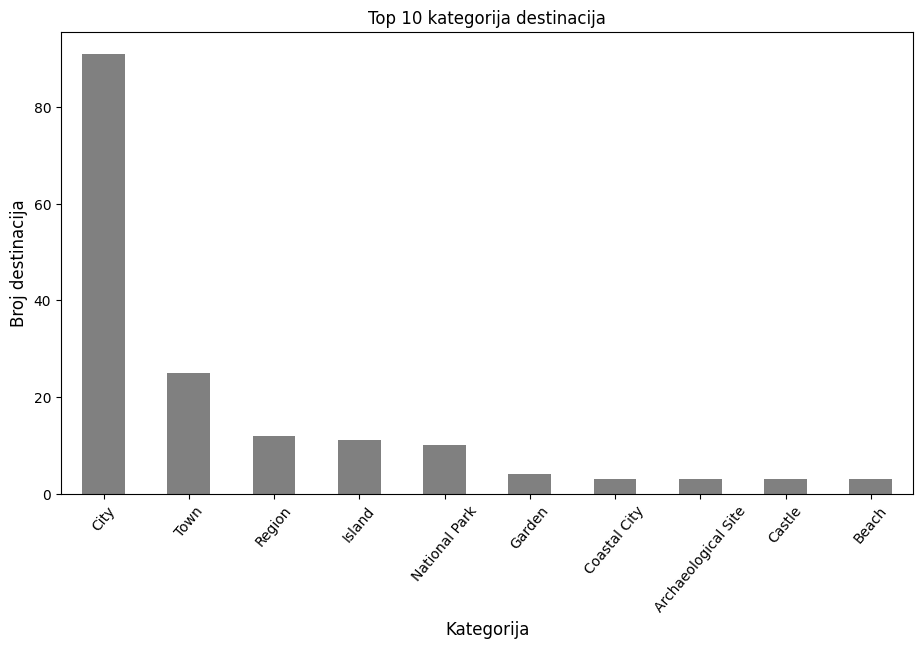

In [88]:
#top 10 najčešće zastupljenih kategorija destinacija

kategorije_po_destinacijama = svi_podaci_df['Kategorija'].value_counts()

top10_kategorija = kategorije_po_destinacijama.head(10)

top10_kategorija.plot(kind='bar', color='grey', figsize=(11, 6), title='Top 10 kategorija destinacija')
plt.xlabel('Kategorija', fontsize=12)
plt.ylabel('Broj destinacija', fontsize=12)
plt.xticks(rotation=50)
plt.show()

Stupčasti dijagram prikazuje distribuciju destinacija prema kategorijama, ograničeno na 10 najčešćih kategorija. Podaci za distribuciju dobiveni su korištenjem funkcije value_counts() na stupcu 'Kategorija' što omogućuje brojanje koliko puta se svaka kategorija pojavljuje. Nakon toga, izdvojeno je samo prvih 10 kategorija korištenjem metode head(10) kako bi prikaz bio pregledniji.

Vizualizacija je kreirana pomoću funkcije plt.bar, gdje su nazivi kategorija prikazani na x-osi, a broj destinacija na y-osi. Kategorija 'City' očito prevladava s najvećim brojem destinacija, dok su kategorije poput 'Town', 'Region', 'Island', 'National Park' i ostale zastupljene u manjem broju.

In [89]:
#prosjecan broj turista po destinacijama

prosjek_turista = svi_podaci_df[['Destinacija', '2018', '2019', '2020', '2021', '2022', '2023']].copy()
prosjek_turista['Prosjek_turista'] = prosjek_turista[['2018', '2019', '2020', '2021', '2022', '2023']].mean(axis=1).astype(int)

prosjek_turista[['Destinacija', 'Prosjek_turista']]

,Destinacija,Prosjek_turista
0,Aalborg,1044625
1,Aarhus,1243668
2,Aarhus Botanical Garden,851730
3,Akureyri,698136
4,Algarve,798340
...,...,...
204,Yorkshire Dales,1050464
205,Ypres,1084439
206,Zell am See,1063127
207,Zermatt,1353745


Tablica prikazuje prosječan broj turista po destinacijama u razdoblju od 2018. do 2023. godine. Prosjek je izračunat korištenjem funkcije mean(axis=1), koja računa aritmetičku sredinu po redovima za svaku destinaciju na temelju podataka o broju turista kroz navedene godine. Dobivene vrijednosti pretvorene su u cijele brojeve pomoću metode astype(int) radi čitljivosti.

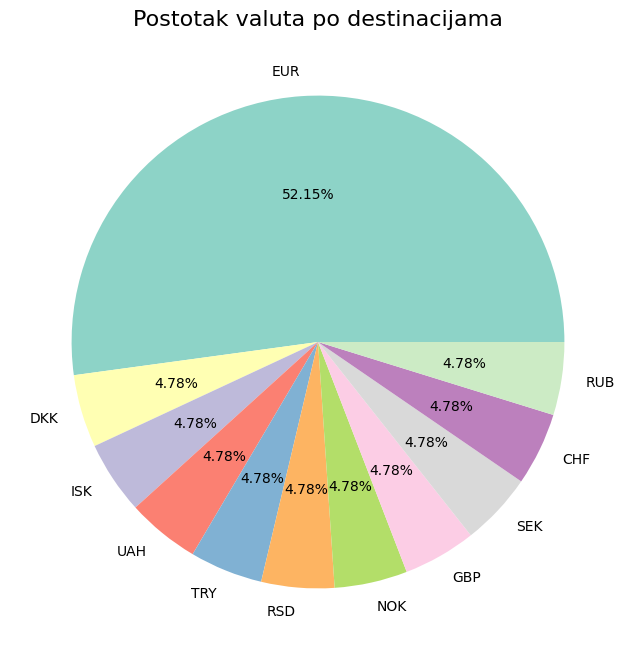

In [90]:
#postotak valuta po destinacijama

valute_po_destinacijama = svi_podaci_df['Valuta'].value_counts()

colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5', '#ffed6f']

plt.figure(figsize=(8, 8))
plt.pie(valute_po_destinacijama, labels=valute_po_destinacijama.index, autopct='%1.2f%%', colors=colors)
plt.title('Postotak valuta po destinacijama', fontsize=16)

plt.show()

Tortni dijagram prikazuje udio različitih valuta koje su primarne na destinacijama. Valuta EUR dominira s udjelom od 52.15%, što znači da većina destinacija koristi euro kao primarnu valutu. Ostale valute su ravnomjernije raspoređene s manjim udjelom od 4.78%. Podaci o valutama dobiveni su pomoću metode value_counts() nad stupcem 'Valuta'. Za prikaz postotaka u dijagramu dodana je opcija autopct='%1.2f%%', dok su boje prilagođene pomoću parametra colors.

In [91]:
#top 5 destinacija s najviše posjetitelja u 2023. godini

top5_destinacija = svi_podaci_df.sort_values(by='2023', ascending=False).head(5)
top5_destinacija[['Destinacija', 'Drzava', '2023']]

,Destinacija,Drzava,2023
163,Santorini,Greece,1997473
100,Loire Valley,France,1973083
11,Bad Gastein,Austria,1954577
205,Ypres,Belgium,1941255
12,Barcelona,Spain,1918443


Prikazana je tablica koja sadrži top 5 destinacija s najvećim brojem posjetitelja u 2023. godini. Najpopularnija destinacija je Santorini u Grčkoj s 1 997 473 posjetitelja, dok je na petom mjestu Barcelona u Španjolskoj s 1 918 443 posjetitelja.

In [92]:
#broj turista 2023 u turističkim destinacijama Italije

destinacije_italija_2023 = svi_podaci_df[svi_podaci_df['Drzava'] == 'Italy']
destinacije_italija_2023[['Destinacija', '2023']]

,Destinacija,2023
5,Amalfi Coast,187721
36,Cinque Terre,971150
55,Florence,170885
91,Lake Como,1216275
119,Milan,570604
131,Naples,1702676
147,Pisa,1058087
157,Rome,1912089
193,Venice,1620149
194,Verona,419044


Ova tablica prikazuje broj turista u 2023. godini u turističkim destinacijama smještenim u Italiji. Podaci su filtrirani iz glavnog skupa podataka korištenjem uvjeta da je stupac 'Država' jednak 'Italy'. Nakon filtriranja, za svaku destinaciju prikazani su nazivi i broj turista tijekom navedene godine.

In [93]:
#broj destinacija po razini sigurnosti
sigurnost_grupa = svi_podaci_df['Sigurnost'].value_counts()
sigurnost_grupa

,count
Sigurnost,
Generally safe,171
Pickpockets,30
Other risks,3
Crowds,2
Restricted access,1
Bears,1
Conflicts,1


Broj destinacija prikazan je prema razini sigurnosti na temelju podataka iz stupca 'Sigurnost'. Metodom value_counts() destinacije su grupirane po njihovim sigurnosnim ocjenama te je izračunat ukupan broj destinacija za svaku kategoriju.

Najveći broj destinacija, njih 171, klasificiran je kao 'Generally safe' što znači da većina destinacija ima visoku razinu sigurnosti.

In [94]:
#destinacije koje imaju problem s pickpockets

pickpockets = svi_podaci_df[svi_podaci_df['Sigurnost'] == 'Pickpockets']
pickpockets[['Destinacija', 'Drzava', 'Sigurnost']]

,Destinacija,Drzava,Sigurnost
9,Athens,Greece,Pickpockets
12,Barcelona,Spain,Pickpockets
14,Belgrade,Serbia,Pickpockets
17,Berlin,Germany,Pickpockets
25,Bordeaux,France,Pickpockets
29,Brussels,Belgium,Pickpockets
31,Cannes,France,Pickpockets
55,Florence,Italy,Pickpockets
65,Granada,Spain,Pickpockets
75,Ibiza,Spain,Pickpockets


Ova tablica sadrži popis destinacija koje imaju problem s džeparenjem tj. Pickpockets. Tablica prikazuje tri stupca: naziv destinacije, državu u kojoj se destinacija nalazi i sigurnost. Podaci su izdvojeni iz glavnog skupa pomoću filtriranja koje je temeljeno na uvjetu da vrijednost u stupcu 'Sigurnost' bude jednaka 'Pickpockets'.

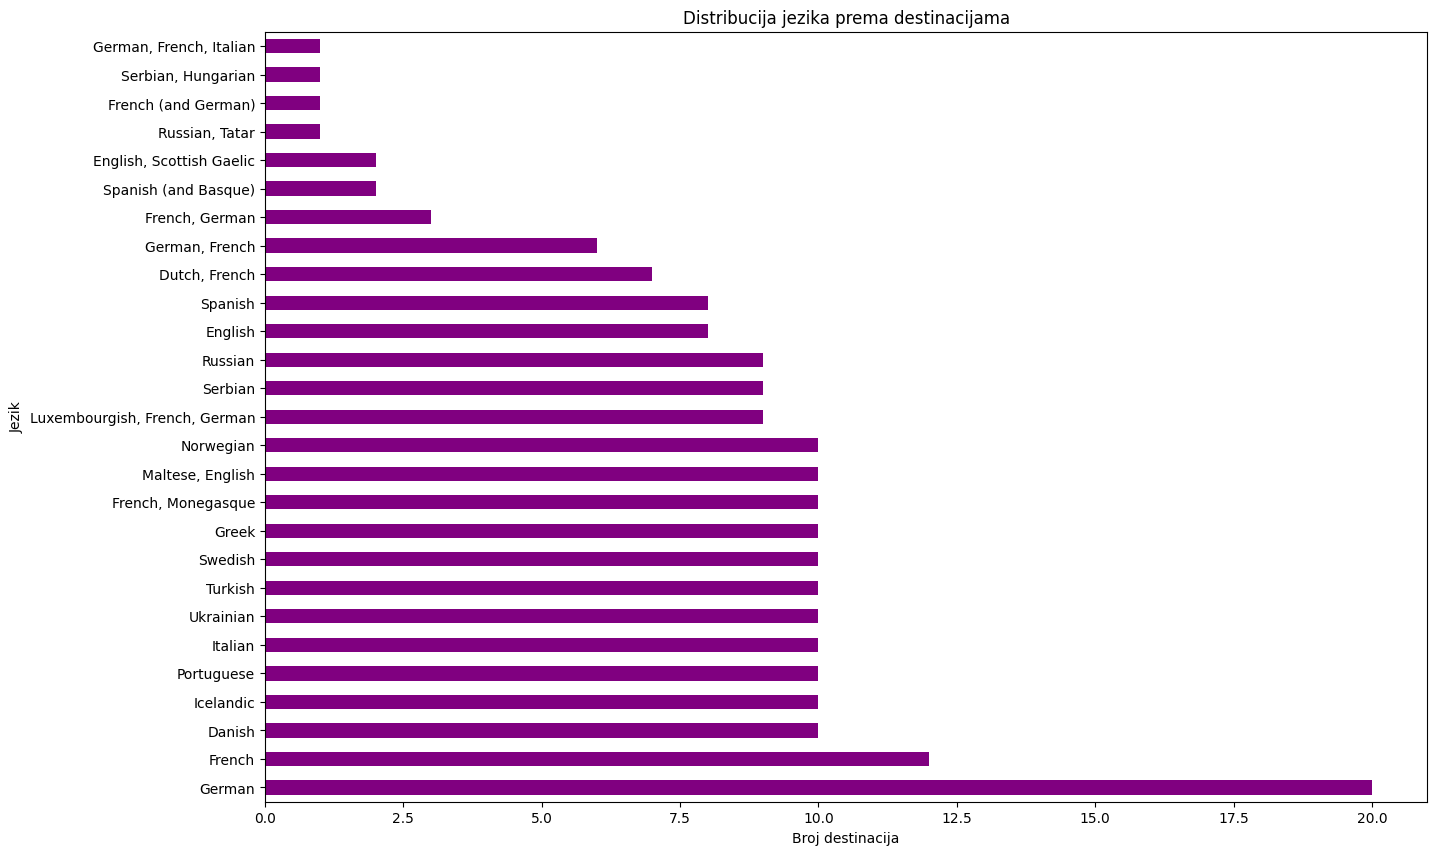

In [95]:
#distribucija jezika koji se govore u destinaicjama

jezici_podaci = svi_podaci_df['Jezik'].value_counts()

jezici_podaci.plot(kind='barh', color='purple', figsize=(15, 10), title='Distribucija jezika prema destinacijama')

plt.xlabel('Broj destinacija')
plt.ylabel('Jezik')
plt.show()


Ovaj grafikon prikazuje distribuciju jezika koji se govore u različitim turističkim destinacijama. Podaci su generirani koristeći metodu value_counts() za brojanje pojavljivanja pojedinih jezika u stupcu 'Jezik'. Na temelju dobivenih rezultata, izrađen je vodoravni stupčasti grafikon pomoću funkcije plot sa specifikacijom kind='barh'. Na grafikonu se jasno vidi da su jezici poput njemačkog i francuskog među najzastupljenijima, dok su jezici s višestrukim nazivima, poput 'German, French, Italian' zastupljeni u manjem broju destinacija.

In [96]:
#najskuplje destinacije prema troškovima života
najskuplje_destinacije = svi_podaci_df[svi_podaci_df['Troskovi zivota'] == 'High']
najskuplje_destinacije[['Destinacija']]

,Destinacija
22,Blue Lagoon
31,Cannes
40,Copenhagen
56,Frankfurt
59,Geneva
83,Jungfraujoch
101,London
119,Milan
128,Mykonos
142,Oslo


Ova tablica prikazuje destinacije klasificirane kao najskuplje prema kategoriji 'Troškovi života'. Na temelju vrijednosti 'High' u stupcu 'Troškovi života', destinacije su filtrirane kako bi se identificirale one s visokim troškovima života.

In [97]:
#kretanje broja turista u svim destinacijama Njemačke tijekom šest godina

destinacije_njemacka = svi_podaci_df[svi_podaci_df['Drzava'] == 'Germany']
destinacije_njemacka[['Destinacija', '2018', '2019', '2020', '2021', '2022', '2023']]

,Destinacija,2018,2019,2020,2021,2022,2023
17,Berlin,158075,502047,1551015,1989602,1316667,655795
20,Black Forest,197965,1394772,92970,1934458,465878,1684962
38,Cologne,1008054,1053499,1499933,689303,1649116,851171
47,Dresden,910094,999579,277878,644176,1519024,1555066
56,Frankfurt,682204,984512,745517,435596,1690431,101449
71,Hamburg,1224056,620977,1943910,1120112,155019,1651525
73,Heidelberg,320096,1511185,1995812,1431229,440877,1548207
127,Munich,1373173,62086,133069,69847,137845,487300
132,Neuschwanstein Castle,76377,616792,932234,539847,1109274,440043
159,Rothenburg ob der Tauber,1559396,1063312,1585020,1490343,111041,577914


Tablica prikazuje broj turista u razdoblju od 2018. do 2023. godine u turističkim destinacijama smještenim u Njemačkoj. Podaci su filtrirani iz glavnog skupa podataka korištenjem uvjeta da stupac 'Država' jednak 'Germany'. Nakon filtriranja, za svaku destinaciju prikazani su nazivi i broj turista tijekom navedenih godina.

## **7. Kritički osvrt**

Projekt je bio izazovan, ali vrlo zanimljiv jer je omogućio praktičnu primjenu tehnologija za obradu i analizu podataka. Posebno mi se svidjelo kako Python, uz biblioteke poput pandas i numpy, omogućuje intuitivnu manipulaciju podacima i rješavanje kompleksnih zadataka na jednostavan način. Jupyter Notebook se pokazao kao izvrsno okruženje za rad, zahvaljujući svojoj preglednosti i mogućnosti brzog testiranja i vizualizacije rezultata. SQLite je bio praktičan izbor za pohranu podataka, osobito zbog svoje jednostavnosti i lokalne implementacije. Razvoj REST API-ja uz Flask bio je posebno koristan jer je omogućio integraciju različitih dijelova projekta u jednu funkcionalnu cjelinu. Vizualizacija podataka uz matplotlib i seaborn bila je jedan od najzanimljivijih dijelova projekta, ali i najzahtjevnijih. Ove biblioteke nude veliku fleksibilnost u prikazu podataka, ali zahtijevaju preciznost i pažnju pri interpretaciji rezultata kako bi se izbjegle pogrešne interpretacije.

Jedan od ključnih izazova bio je rad s podacima generiranim pomoću biblioteke Faker. Iako su takvi podaci praktični za demonstraciju tehničkih mogućnosti, smatram da bi rad sa stvarnim i točnim skupom podataka značajno poboljšao kvalitetu i vjerodostojnost projekta. Stvarni podaci omogućili bi dublje uvide i realnije testiranje sustava, što bi projekt učinilo još korisnijim.

Ipak, rad na ovom projektu bio je odlična prilika za učenje i razumijevanje potencijala koje nudi Python. Kroz korištenje različitih biblioteka shvatila sam koliko mogućnosti stoji na raspolaganju i kako ih integrirati za rješavanje praktičnih problema.

## **8. Zaključak**

Podaci o turizmu i turističkim destinacijama danas su iznimno važni zbog njihovog značaja u ekonomskom razvoju i donošenju strateških odluka. Cilj ovog projekta bio je analizirati i vizualizirati podatke o europskim turističkim destinacijama. Projekt je obuhvatio niz koraka, uključujući uvoz podataka iz csv i xlsx formata, njihovu obradu i pohranu u lokalnu SQLite bazu podataka. Korištenjem Flask biblioteke razvijen je REST API koji omogućuje jednostavan pristup i manipulaciju podacima putem web usluga. Konačno, analiza podataka i njihova vizualizacija pomoću Python biblioteka pandas, matplotlib i seaborn pružili su uvide u karakteristike turističkih destinacija i kretanja turista.

Ovim projektom pokazano je kako Python, uz pomoć svojih brojnih biblioteka, predstavlja odličan alat za obradu, analizu i vizualizaciju podataka. Rezultati ovog projekta pružaju korisne uvide u turističke obrasce, a također pokazuju kako se suvremene tehnologije mogu učinkovito primijeniti za analizu podataka.

## **9. Literatura**

[1] F. Adani, "European Tour Destinations Dataset", Kaggle, [Online]. Dostupno na: https://www.kaggle.com/datasets/faizadani/european-tour-destinations-dataset/data. [Pristupljeno: 3. siječnja 2025.].

[2] W. McKinney, Python for Data Analysis, 2nd ed., [Online]. Dostupno na: https://wesmckinney.com/book/. [Pristupljeno: 3. siječnja 2025.].

[3] OpenAI, "Privatni razgovor s jezičkim modelom ChatGPT", privatna komunikacija, Dostupno na: https://chat.openai.com/share/6780f6d9-f994-8003-8c37-85b788674289. [Pristupljeno: siječanj 2025.].

[4] Pandas, "pandas.DataFrame.to_sql", Pandas Documentation, [Online]. Dostupno na: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html. [Pristupljeno: 5. siječnja 2025.].

[5] R. Bhave, "Using Faker and Pandas Python Libraries to Create Synthetic Data for Testing," DEV Community, [Online]. Dostupno na: https://dev.to/rahulbhave/using-faker-and-pandas-python-libraries-to-create-synthetic-data-for-testing-4gn4. [Pristupljeno: 4. siječnja 2025.].